## Estimation de la moyenne, erreur et variance/covariance
Le but de ce TP est d'un part d'observer dans des exemples simples les estimations de la valeur moyenne (lorsque l'on connnaît la vérité terrain) et de voir comment mesurer l'erreur sur celle-ci.
Dans un second temps, on regardera (toujours sur des cas contrôlés) la signification de la covariance et une façon de réduite naïvement la dimension des données.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

  * Générer $N_s = 10^{2,3,4,5,6}$ variables Gaussienns de moyennes 0 et de variance 2.
  * Afficher pour chacune des valeurs l'estimation de la valeur moyenne et de la variance. 
  * Comment calcule-t-on l'erreur sur l'estimation de la moyenne ?
  * Vous afficherez les résultats sur un plot en échelle logarithmique pour l'axe x (pourquoi l'échelle log ?). 
  * A l'aide de la fonction 'errorbar' faire un graphe avec la barre d'erreur.
  * Que se passe-t-il si la variance n'est pas 2 mais 10

In [2]:
# Génerer 10^{2,3,4,5,6} variables Gaussienns de moyennes 0 et de variance 2
NbS = np.array(10**np.arange(2,9))
print(NbS)
est_m = np.array([])
est_v = np.array([])
err = np.array([])
for ns in NbS:
    ech = np.random.normal(0,100,size=(ns))
    est_m = np.append(est_m,np.mean(ech))
    est_v = np.append(est_v,np.var(ech))
    # erreur = sqrt(var/Ns)
    err = np.append(err,np.sqrt(np.var(ech)/ns))
    
print("moyennes: ",est_m)
print("variances: ",est_v)
print("erreurs: ",err)

[      100      1000     10000    100000   1000000  10000000 100000000]
moyennes:  [-4.44189718 -5.61834124 -0.57254674  0.28463448  0.06069726  0.05928162
 -0.00812482]
variances:  [ 8420.19585937 10218.95881908 10013.92777276 10012.40980251
 10000.65378535  9999.58861948  9998.92712237]
erreurs:  [9.17616252 3.19671062 1.00069615 0.31642392 0.10000327 0.03162213
 0.00999946]


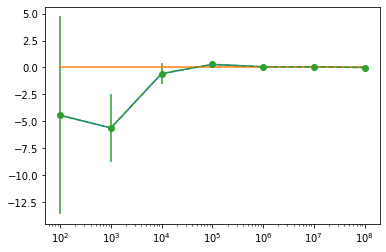

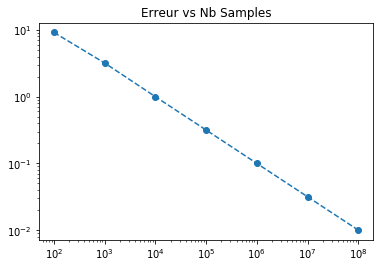

In [3]:
plt.semilogx(NbS,est_m)
plt.semilogx(NbS,est_m*0)
plt.errorbar(NbS,est_m, yerr=err, fmt='--o')
plt.show()
plt.title("Erreur vs Nb Samples")
plt.loglog(NbS,err,'--o')

[      100      1000     10000    100000   1000000  10000000 100000000]
moyennes:  [ 2.18716615e+00  1.85435316e-01 -1.32326635e-01 -5.50772498e-02
 -7.68080472e-03  1.65070774e-03 -2.36262938e-04]
variances:  [ 71.08895217 103.0856076   98.65531618 100.39213889 100.0481923
 100.01329403 100.01404929]
erreurs:  [0.84314265 0.32106947 0.09932538 0.03168472 0.01000241 0.00316249
 0.00100007]


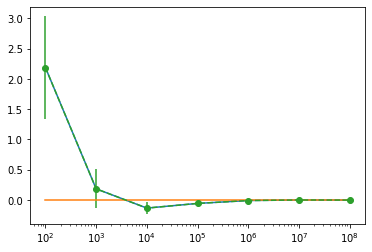

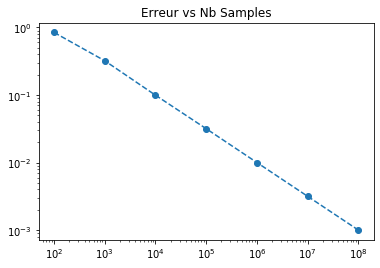

In [4]:
# Génerer 10^{2,3,4,5,6} variables Gaussienns de moyennes 0 et de variance 10
NbS = np.array(10**np.arange(2,9))
print(NbS)
est_m = np.array([])
est_v = np.array([])
err = np.array([])
for ns in NbS:
    ech = np.random.normal(0,10,size=(ns))
    est_m = np.append(est_m,np.mean(ech))
    est_v = np.append(est_v,np.var(ech))
    # erreur = sqrt(var/Ns)
    err = np.append(err,np.sqrt(np.var(ech)/ns))
    
print("moyennes: ",est_m)
print("variances: ",est_v)
print("erreurs: ",err)

plt.semilogx(NbS,est_m)
plt.semilogx(NbS,est_m*0)
plt.errorbar(NbS,est_m, yerr=err, fmt='--o')
plt.show()
plt.title("Erreur vs Nb Samples")
plt.loglog(NbS,err,'--o')

On voit que l'erreur décroit avec le nombre d'échantillon. La décroissance est en loi de puissance.
L'erreur augment avec la variance.

Dans le fichier "data_ping.d", sont enregistrés les données du temps de ping vers un serveur.
  * Tracer l'histogramme des valeurs, que constatez-vous ?
  * Estimez la valeur moyenne et son erreur

A l'aide de la fonction "np.random.permutation":
  * obtenez $200$ estimations (dans un tableau) de la valeur moyenne en prenant $30$ valeurs aléatoire parmis le jeu de données.
  * Faites l'histogramme des valeurs obtenues. 
  * En utilisant l'histogramme, pouvez-vous devinez la distribution obtenue ? (vous pouvez aussi tracer l'histogramme avec l'option "log=True" pour mettre l'échelle y en log)
  * Tracer la distribution intuitée pour s'en assurer, que remarquez-vous ?
  
Bonus : sur la distribution des valeurs du ping, saurez-vous estimez le comportement de la distribution pour les "grandes" valeurs de ping ?

/home/aurele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


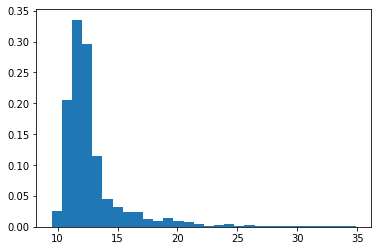

moyenne=  12.836788732394366
variance=  2.9335520070217282
erreur= 0.040653479015560025


/home/aurele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


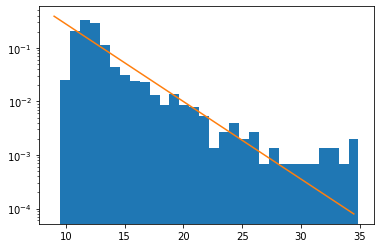

In [5]:
dp=np.genfromtxt("data_ping")
plt.hist(dp,bins=30,normed=True)
plt.show()
plt.hist(dp,bins=30,log=True, normed=True)
myx = np.arange(9,35,0.5)
myx = np.arange(5,40,1)
print("moyenne= ",np.mean(dp))
print("variance= ",np.std(dp))
print("erreur=", (np.std(dp)/dp.shape[0])**0.5)

#comportement exponentiel
myx = np.arange(9,35,0.5)
plt.plot(myx,np.exp(-(myx-11.0)/3)/5)


In [6]:
est_m = np.array([])
for i in range(200):
    idp = np.random.permutation(np.arange(1775))
    est_m = np.append(est_m,np.mean(dp[idp[:30]]))


/home/aurele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


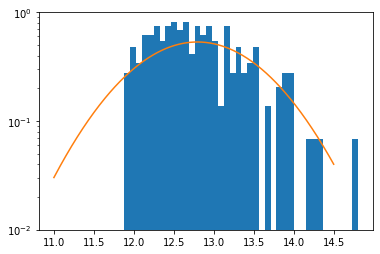

In [7]:
# on definit la pdf
def gauss(x,m,s):
    return 1/np.sqrt(2*np.pi*s) * np.exp(-(x-m)**2 / (2.0*s) )
myx = np.arange(11,14.5,0.01)
mu, beta = 12.6, 0.4
count, bins, ignored= plt.hist(est_m,bins=40,normed=True, log=True)
plt.ylim(0.01,1)
plt.semilogy(myx,gauss(myx,np.mean(est_m),np.std(est_m)))
plt.show()

La distribution gaussienne semble caractériser les fluctucations sur la valeur moyenne, on a évidement des phénomènes de coupure à gauche.